# **Conhecendo a nossa base de consumidores**

Esse conteúdo faz parte da aceleração de Data Science da [Codenation](https://https://www.codenation.dev/).

**Objetivo**

Queremos conhecer melhor nossos clientes por estado. Para isso, iniciamos uma análise na pontuação de crédito. Para realizar a verificação inicial, precisamos de alguns valores. Os valores são a média, a mediana, a moda e o desvio padrão da pontuação de crédito.

In [1]:
# importando bibliotecas
!pip install missingno

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import missingno as msno 

# configurando gráficos
sns.set_style('darkgrid')
sns.set_palette('Accent')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Analisando os Dados do dataset

In [2]:
# carregando o dataset e visualizando as 5 primeiras entradas
df = pd.read_csv('desafio1.csv')
df.head()

,RowNumber,id,sobrenome,pontuacao_credito,estado_residencia,genero,idade,nivel_estabilidade,saldo_conta,numero_produtos,possui_cartao_de_credito,membro_ativo
0,1,e7f44fcbd380d4cef7e6c232cc7e37895c3fd197,6d6e0aa1b9b413e442e2fb68df14b4fc3f91de50,619,SC,F,42,2,0.00,1,1,1
1,2,28dcb083ad90512da16b9430085c2cddb8ca5e12,48e1ad846796fa314f1b4a6702b83343eb5482c5,608,RS,F,41,1,83807.86,1,0,1
2,3,774bc378f787438c9c7594e536787d07a097a54b,f2b29d5d934de615812b697132e767dea0f1e9e2,502,SC,F,42,8,159660.80,3,1,0
3,4,043a71326f7096de155e7f0c559dc62b5e4b7239,85d5c9da7cddd8109ad32a6c348fe2bb10bf99f2,699,SC,F,39,1,0.00,2,0,0
4,5,37b3bb8ca243955fb3605ec7e1c2a4607cdb3b22,ddc89c837a6933639de75f28171057060bd322df,850,RS,F,43,2,125510.82,1,1,1


In [3]:
df.drop(['RowNumber'], axis=1, inplace=True)

In [4]:
df.head()

,id,sobrenome,pontuacao_credito,estado_residencia,genero,idade,nivel_estabilidade,saldo_conta,numero_produtos,possui_cartao_de_credito,membro_ativo
0,e7f44fcbd380d4cef7e6c232cc7e37895c3fd197,6d6e0aa1b9b413e442e2fb68df14b4fc3f91de50,619,SC,F,42,2,0.00,1,1,1
1,28dcb083ad90512da16b9430085c2cddb8ca5e12,48e1ad846796fa314f1b4a6702b83343eb5482c5,608,RS,F,41,1,83807.86,1,0,1
2,774bc378f787438c9c7594e536787d07a097a54b,f2b29d5d934de615812b697132e767dea0f1e9e2,502,SC,F,42,8,159660.80,3,1,0
3,043a71326f7096de155e7f0c559dc62b5e4b7239,85d5c9da7cddd8109ad32a6c348fe2bb10bf99f2,699,SC,F,39,1,0.00,2,0,0
4,37b3bb8ca243955fb3605ec7e1c2a4607cdb3b22,ddc89c837a6933639de75f28171057060bd322df,850,RS,F,43,2,125510.82,1,1,1


## Dicionário de variáveis

<ul>
<li><b>id</b>: Identificador do cliente</li>
    
<li><b>sobrenome</b>: Sobrenome do cliente</li>

<li><b>pontuacao_credito</b>: Pontuação de crédito do cliente (quanto maior, melhor o cliente geralmente)</li>

<li><b>estado_residencia</b>: Estado de residência do cliente</li>

<li><b>genero</b>: Gênero do cliente</li>

<li><b>nivel_estabilidade</b>: Nível de estabilidade do cliente</li>

<li><b>saldo_conta</b>: Saldo disponível na conta do cliente</li>

<li><b>numero_produtos</b>: Número de produtos que o cliente consome</li>

<li><b>possui_cartao_de_credito</b>: Possui um cartão de crédito cadastrado</li>

<li><b>membro_ativo</b>: Membro acessa e consome frequentemente </li>
</ul>

In [5]:
# dimensões do DataFrame
print(f'Linhas: {df.shape[0]}')
print(f'Colunas: {df.shape[1]}')

Linhas: 7000
Colunas: 11


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        7000 non-null   object 
 1   sobrenome                 7000 non-null   object 
 2   pontuacao_credito         7000 non-null   int64  
 3   estado_residencia         7000 non-null   object 
 4   genero                    7000 non-null   object 
 5   idade                     7000 non-null   int64  
 6   nivel_estabilidade        7000 non-null   int64  
 7   saldo_conta               7000 non-null   float64
 8   numero_produtos           7000 non-null   int64  
 9   possui_cartao_de_credito  7000 non-null   int64  
 10  membro_ativo              7000 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 601.7+ KB


In [7]:
# verificando a existência de valores NaN
df.isna().any()

id                          False
sobrenome                   False
pontuacao_credito           False
estado_residencia           False
genero                      False
idade                       False
nivel_estabilidade          False
saldo_conta                 False
numero_produtos             False
possui_cartao_de_credito    False
membro_ativo                False
dtype: bool

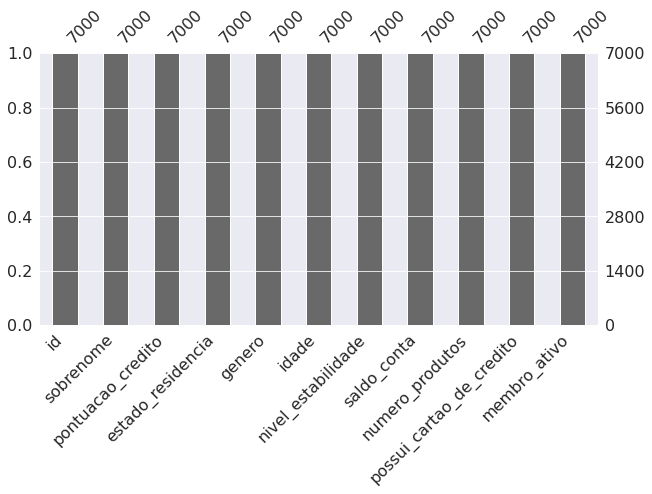

In [8]:
# visualização que confirma que não temos linhas com missiging values (NaN)
msno.bar (df, figsize = (10,5))

In [9]:
# resumo estatístico
df.describe()

,pontuacao_credito,idade,nivel_estabilidade,saldo_conta,numero_produtos,possui_cartao_de_credito,membro_ativo
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,649.787000,38.892714,5.010286,76471.883751,1.526000,0.703286,0.512143
std,97.046279,10.465562,2.887500,62403.383911,0.583047,0.456842,0.499888
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,582.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000
50%,651.000000,37.000000,5.000000,97277.130000,1.000000,1.000000,1.000000
75%,717.000000,44.000000,7.250000,127537.155000,2.000000,1.000000,1.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000


In [10]:
# analisando as relações entre as variáveis
corr = df.corr()
corr

,pontuacao_credito,idade,nivel_estabilidade,saldo_conta,numero_produtos,possui_cartao_de_credito,membro_ativo
pontuacao_credito,1.000000,-0.002839,0.007233,0.009761,0.000996,-0.007987,0.033992
idade,-0.002839,1.000000,-0.002389,0.027459,-0.040531,-0.010335,0.093664
nivel_estabilidade,0.007233,-0.002389,1.000000,-0.020527,0.018088,0.036107,-0.029980
saldo_conta,0.009761,0.027459,-0.020527,1.000000,-0.303407,-0.019398,-0.006482
numero_produtos,0.000996,-0.040531,0.018088,-0.303407,1.000000,-0.007240,0.007005
possui_cartao_de_credito,-0.007987,-0.010335,0.036107,-0.019398,-0.007240,1.000000,-0.014564
membro_ativo,0.033992,0.093664,-0.029980,-0.006482,0.007005,-0.014564,1.000000


![image.png](https://i0.wp.com/www.abgconsultoria.com.br/blog/wp-content/uploads/img2-2.png?w=1500)

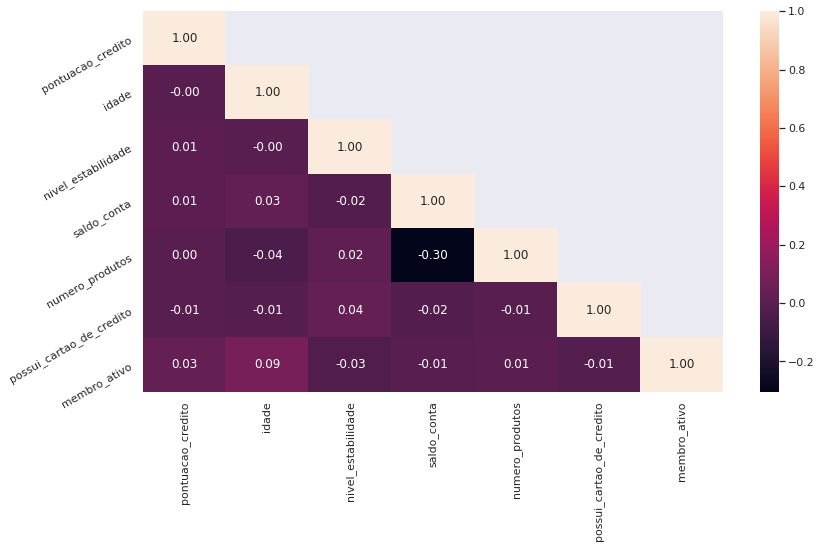

In [11]:
corr = df.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

# **1. Analisando cada variável separadamente**

In [12]:
df.head(10)

,id,sobrenome,pontuacao_credito,estado_residencia,genero,idade,nivel_estabilidade,saldo_conta,numero_produtos,possui_cartao_de_credito,membro_ativo
0,e7f44fcbd380d4cef7e6c232cc7e37895c3fd197,6d6e0aa1b9b413e442e2fb68df14b4fc3f91de50,619,SC,F,42,2,0.00,1,1,1
1,28dcb083ad90512da16b9430085c2cddb8ca5e12,48e1ad846796fa314f1b4a6702b83343eb5482c5,608,RS,F,41,1,83807.86,1,0,1
2,774bc378f787438c9c7594e536787d07a097a54b,f2b29d5d934de615812b697132e767dea0f1e9e2,502,SC,F,42,8,159660.80,3,1,0
3,043a71326f7096de155e7f0c559dc62b5e4b7239,85d5c9da7cddd8109ad32a6c348fe2bb10bf99f2,699,SC,F,39,1,0.00,2,0,0
4,37b3bb8ca243955fb3605ec7e1c2a4607cdb3b22,ddc89c837a6933639de75f28171057060bd322df,850,RS,F,43,2,125510.82,1,1,1
5,db5cf32c3fbc7c5d8f8313afca1d099de6dc055f,a596384ca70664af4c5fac9f935cff186b8e8bc0,645,RS,M,44,8,113755.78,2,1,0
6,8f3cc64a0a84bab38fefb030f09757d0cbf03bb2,abec3e525ab40e45975c91d4fa2bc7b318d93de4,822,SC,M,50,7,0.00,2,1,1
7,6704b822c203e2dda9f225dfc4f1bed2ae9044e6,336b42483e6a17f48eb040a251b5d6e64d1351a9,376,PR,F,29,4,115046.74,4,1,0
8,35f41954a87f722a3960e5fa8ce898a09398a564,53a417796c777851003b3f2431e8eef5625ec15b,501,SC,M,44,4,142051.07,2,0,1
9,f110be36fc6171a7da472b9cbac8698df880aac6,b89d09fc7719cb3c4a87e4a61cb87b3465e9d8ff,684,SC,M,27,2,134603.88,1,1,1


## **1.01 - Pontuação Crédito**

Pontuação de crédito do cliente.

In [13]:
print('Valores únicos: {}'.format(df['pontuacao_credito'].nunique()))

Valores únicos: 451


,pontuacao_credito
count,7000.000000
mean,649.787000
std,97.046279
min,350.000000
25%,582.000000
50%,651.000000
75%,717.000000
max,850.000000


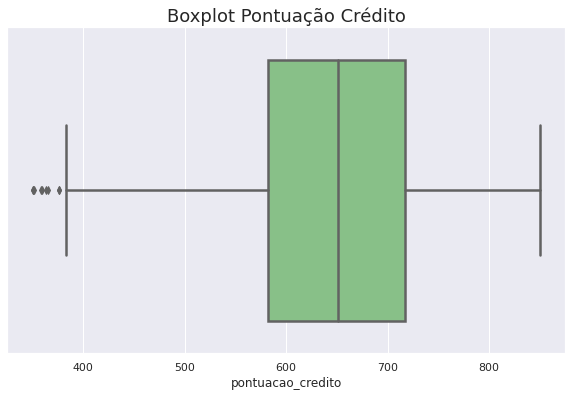

In [14]:
# resumo estatístico
display(pd.DataFrame(df['pontuacao_credito'].describe()))

ax = plt.subplots(figsize=(10,6))
ax = sns.boxplot(df['pontuacao_credito'])
ax.set_title('Boxplot Pontuação Crédito', fontsize=18);

Média pontuação de crédito por estado:

In [15]:
df.groupby('estado_residencia').agg({'pontuacao_credito' : 'mean'})

,pontuacao_credito
estado_residencia,
PR,648.961294
RS,651.105143
SC,649.537653


Média pontuação de crédito por gênero:

In [16]:
df.groupby('genero').agg({'pontuacao_credito' : 'mean'})

,pontuacao_credito
genero,
F,648.607666
M,650.785281


## **1.02 - Estado Residência**

Estado de residência do cliente

In [17]:
# resumo estatístico
pd.DataFrame(df['estado_residencia'].describe())

,estado_residencia
count,7000
unique,3
top,SC
freq,3519


SC    3519
RS    1750
PR    1731
Name: estado_residencia, dtype: int64

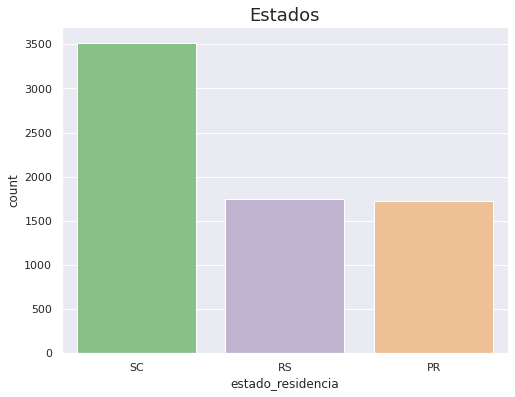

In [18]:
display(df['estado_residencia'].value_counts())

ax = plt.subplots(figsize=(8,6))
ax = sns.countplot(x='estado_residencia', data=df)
ax.set_title('Estados', fontsize=18);

Gêneros por estado:

genero
estado_residencia genero        
PR                F          819
                  M          912
RS                F          791
                  M          959
SC                F         1599
                  M         1920

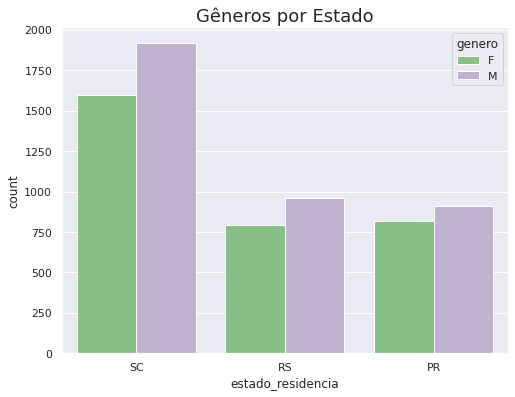

In [19]:
display(df.groupby(['estado_residencia', 'genero']).agg({'genero' : 'count'}))

ax = plt.subplots(figsize=(8,6))
ax = sns.countplot(x='estado_residencia', data=df, hue='genero')
ax.set_title('Gêneros por Estado', fontsize=18);

Média de idade por estado:

In [20]:
df.groupby(['estado_residencia']).agg({'idade' : 'mean'})

,idade
estado_residencia,
PR,39.492779
RS,39.124000
SC,38.482523


## **1.03 - Gênero**

Gênero do cliente.

In [21]:
# resumo estatístico
pd.DataFrame(df['genero'].describe())

,genero
count,7000
unique,2
top,M
freq,3791


M    3791
F    3209
Name: genero, dtype: int64

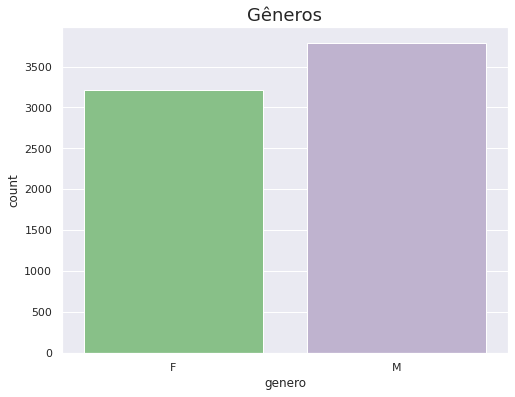

In [22]:
display(df['genero'].value_counts())

ax = plt.subplots(figsize=(8,6))
ax = sns.countplot(x='genero', data=df)
ax.set_title('Gêneros', fontsize=18);

Média idade por gênero:

In [23]:
df.groupby('genero').agg({'idade' : 'mean'})

,idade
genero,
F,39.249922
M,38.590346


Membros ativos por gênero:

In [24]:
df.groupby(['genero', 'membro_ativo']).agg({'membro_ativo' : 'count'})

membro_ativo
genero membro_ativo              
F      0                     1598
       1                     1611
M      0                     1817
       1                     1974

## **1.04 - Idade**

Idade do cliente.

,idade
count,7000.000000
mean,38.892714
std,10.465562
min,18.000000
25%,32.000000
50%,37.000000
75%,44.000000
max,92.000000


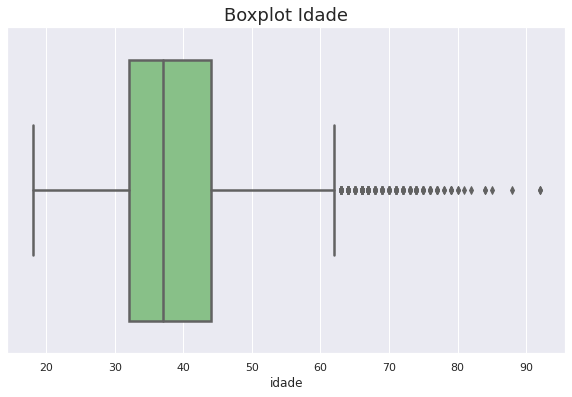

In [25]:
# resumo estatístico
display(pd.DataFrame(df['idade'].describe()))

ax = plt.subplots(figsize=(10,6))
ax = sns.boxplot(df['idade'])
ax.set_title('Boxplot Idade', fontsize=18);

In [26]:
# criando intervalo de idade
intervalo_idade = pd.cut(df['idade'], 5)
print(intervalo_idade)

df ['intervalo_idade'] = intervalo_idade

0         (32.8, 47.6]
1         (32.8, 47.6]
2         (32.8, 47.6]
3         (32.8, 47.6]
4         (32.8, 47.6]
             ...      
6995    (17.926, 32.8]
6996      (47.6, 62.4]
6997      (62.4, 77.2]
6998      (32.8, 47.6]
6999    (17.926, 32.8]
Name: idade, Length: 7000, dtype: category
Categories (5, interval[float64]): [(17.926, 32.8] < (32.8, 47.6] < (47.6, 62.4] < (62.4, 77.2] <
                                    (77.2, 92.0]]


(32.8, 47.6]      3837
(17.926, 32.8]    1971
(47.6, 62.4]       947
(62.4, 77.2]       229
(77.2, 92.0]        16
Name: idade, dtype: int64

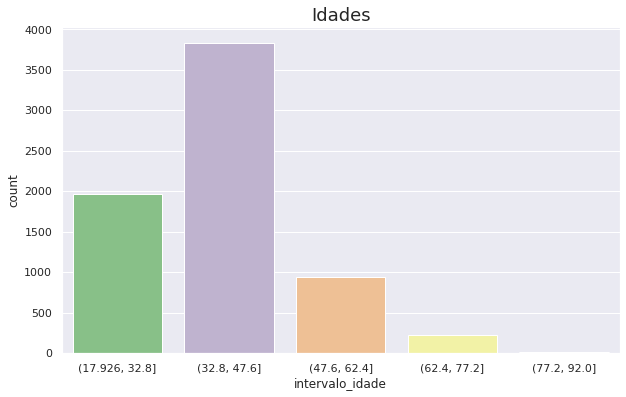

In [27]:
display(intervalo_idade.value_counts())

ax = plt.subplots(figsize=(10,6))
ax = sns.countplot(x='intervalo_idade', data=df)
ax.set_title('Idades', fontsize=18);

## **1.05 - Nível Estabilidade**

Nível de estabilidade do cliente.

,nivel_estabilidade
count,7000.000000
mean,5.010286
std,2.887500
min,0.000000
25%,3.000000
50%,5.000000
75%,7.250000
max,10.000000


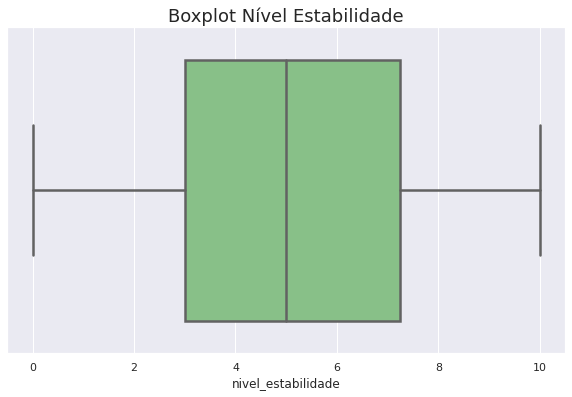

In [28]:
# resumo estatístico
display(pd.DataFrame(df['nivel_estabilidade'].describe()))

ax = plt.subplots(figsize=(10,6))
ax = sns.boxplot(df['nivel_estabilidade'])
ax.set_title('Boxplot Nível Estabilidade', fontsize=18);

7     726
8     725
3     724
2     721
1     720
5     718
9     700
4     683
6     664
10    325
0     294
Name: nivel_estabilidade, dtype: int64

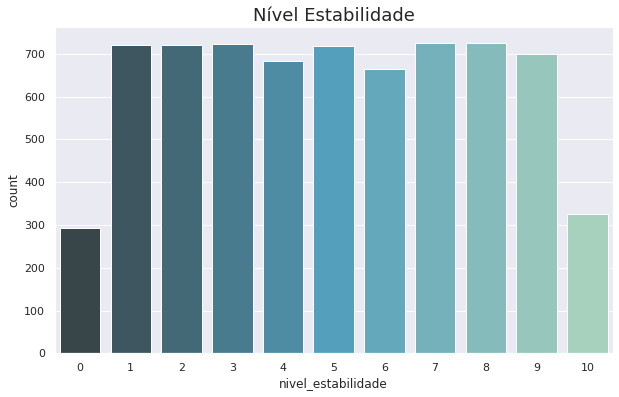

In [29]:
display(df['nivel_estabilidade'].value_counts())

ax = plt.subplots(figsize=(10,6))
ax = sns.countplot(x='nivel_estabilidade', data=df, palette='GnBu_d')
ax.set_title('Nível Estabilidade', fontsize=18);

## **1.06 - Saldo Conta**

Saldo disponível na conta do cliente

,saldo_conta
count,7000.000000
mean,76471.883751
std,62403.383911
min,0.000000
25%,0.000000
50%,97277.130000
75%,127537.155000
max,250898.090000


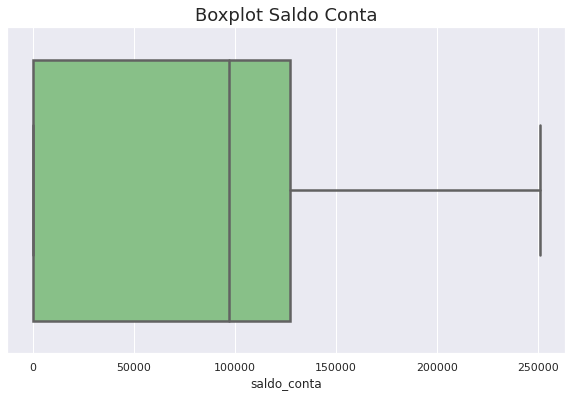

In [30]:
display(pd.DataFrame(df['saldo_conta'].describe()))

ax = plt.subplots(figsize=(10,6))
ax = sns.boxplot(df['saldo_conta'])
ax.set_title('Boxplot Saldo Conta', fontsize=18);

Média saldo na conta por gênero:

In [31]:
df.groupby('genero').agg({'saldo_conta' : 'mean'})

,saldo_conta
genero,
F,75286.439897
M,77475.336489


Média saldo na conta por estado:

In [32]:
df.groupby('estado_residencia').agg({'saldo_conta' : 'mean'})

,saldo_conta
estado_residencia,
PR,119458.904945
RS,62169.610400
SC,62439.046206


Média saldo na conta por pontuação de crédito:

In [33]:
df.groupby('pontuacao_credito').agg({'saldo_conta' : 'mean'}).round(2)

,saldo_conta
pontuacao_credito,
350,131205.34
351,163146.46
358,143542.36
359,128747.69
363,146098.43
...,...
846,0.00
847,111346.20
848,117563.99


Média saldo na conta por intervalo de idade:

In [34]:
df.groupby('intervalo_idade').agg({'saldo_conta' : 'mean'}).round(2)

,saldo_conta
intervalo_idade,
"(17.926, 32.8]",73112.61
"(32.8, 47.6]",76744.00
"(47.6, 62.4]",83317.11
"(62.4, 77.2]",74511.12
"(77.2, 92.0]",47947.54


In [35]:
# criando um intervalo de valores para saldo na conta
intervalo_saldo_conta = pd.cut(df['saldo_conta'], 5)

df['intervalo_saldo_conta'] = intervalo_saldo_conta

(100359.236, 150538.854]    2685
(-250.898, 50179.618]       2583
(50179.618, 100359.236]     1070
(150538.854, 200718.472]     641
(200718.472, 250898.09]       21
Name: saldo_conta, dtype: int64

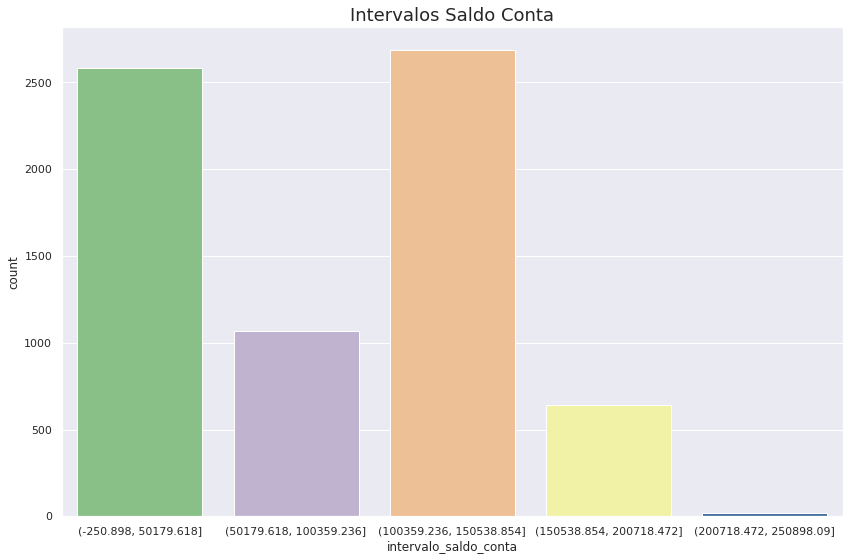

In [36]:
display(intervalo_saldo_conta.value_counts())

ax = plt.subplots(figsize=(14,9))
ax = sns.countplot(x='intervalo_saldo_conta', data=df)
ax.set_title('Intervalos Saldo Conta', fontsize=18);

## **1.07 - Possui Cartão de Crédito?**

Possui um cartão de crédito cadastrado (0 = Não, 1 = Sim)


1    4923
0    2077
Name: possui_cartao_de_credito, dtype: int64

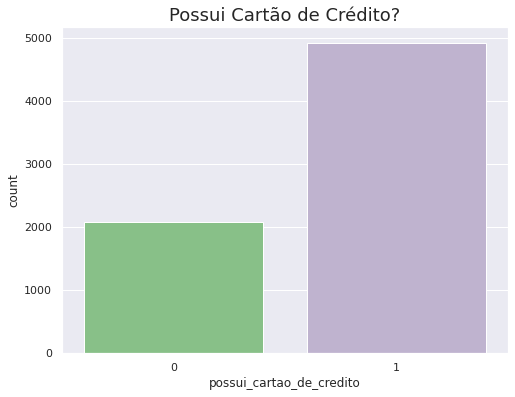

In [37]:
display(df['possui_cartao_de_credito'].value_counts())

ax = plt.subplots(figsize=(8,6))
ax = sns.countplot(x='possui_cartao_de_credito', data=df)
ax.set_title('Possui Cartão de Crédito?', fontsize=18);

Possui cartão de crédito por gênero:

possui_cartao_de_credito
genero possui_cartao_de_credito                          
F      0                                              980
       1                                             2229
M      0                                             1097
       1                                             2694

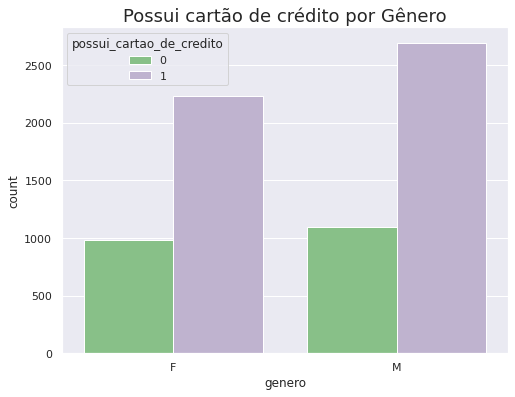

In [38]:
display(df.groupby(['genero', 'possui_cartao_de_credito']).agg({'possui_cartao_de_credito' : 'count'}))

ax = plt.subplots(figsize=(8,6))
ax = sns.countplot(x='genero', data=df, hue='possui_cartao_de_credito')
ax.set_title('Possui cartão de crédito por Gênero', fontsize=18);

Possui cartão de crédito por intervalo de idade:

possui_cartao_de_credito
intervalo_idade possui_cartao_de_credito                          
(17.926, 32.8]  0                                              564
                1                                             1407
(32.8, 47.6]    0                                             1140
                1                                             2697
(47.6, 62.4]    0                                              299
                1                                              648
(62.4, 77.2]    0                                               68
                1                                              161
(77.2, 92.0]    0                                                6
                1                                               10

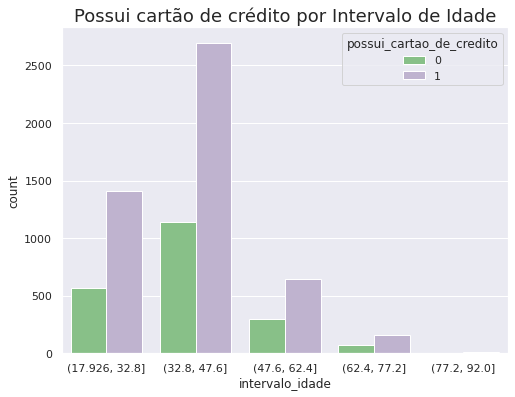

In [39]:
display(df.groupby(['intervalo_idade', 'possui_cartao_de_credito']).agg({'possui_cartao_de_credito' : 'count'}))

ax = plt.subplots(figsize=(8,6))
ax = sns.countplot(x='intervalo_idade', data=df, hue='possui_cartao_de_credito')
ax.set_title('Possui cartão de crédito por Intervalo de Idade', fontsize=18);

## **1.08 - Membro Ativo**

Membro acessa e consome frequentemente (0 = Não, 1 = Sim) 

1    3585
0    3415
Name: membro_ativo, dtype: int64

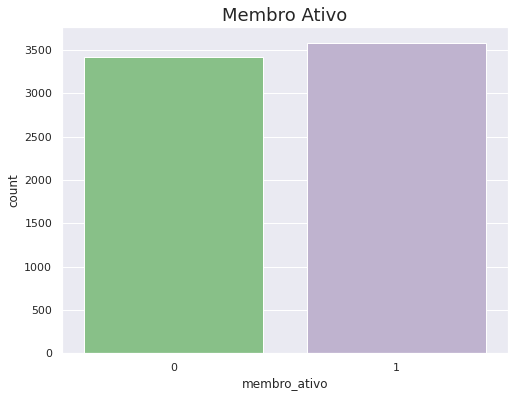

In [40]:
display(df['membro_ativo'].value_counts())

ax = plt.subplots(figsize=(8,6))
ax = sns.countplot(x='membro_ativo', data=df)
ax.set_title('Membro Ativo', fontsize=18);

Membro ativo por gênero:

In [41]:
df.groupby(['genero', 'membro_ativo']).agg({'membro_ativo' : 'count'})

membro_ativo
genero membro_ativo              
F      0                     1598
       1                     1611
M      0                     1817
       1                     1974

Média de pontuação de crédito membro ativo:

In [42]:
df.groupby(['membro_ativo']).agg({'pontuacao_credito' : 'mean'})

,pontuacao_credito
membro_ativo,
0,646.407321
1,653.006416


Membro ativo por intervalo de idade:

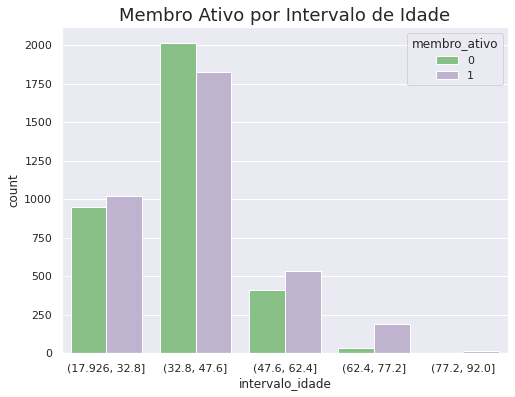

In [43]:
df.groupby(['intervalo_idade', 'membro_ativo']).agg({'membro_ativo' : 'count'})

ax = plt.subplots(figsize=(8,6))
ax = sns.countplot(x='intervalo_idade', data=df, hue='membro_ativo')
ax.set_title('Membro Ativo por Intervalo de Idade', fontsize=18);

#**2. Respostas do Desafio**

A resposta deve conter os valores da média, mediana, moda e desvio padrão da pontuação de crédito para cada estado do dataset.

**Média:**

In [44]:
df.groupby('estado_residencia').agg({'pontuacao_credito': 'mean'})

,pontuacao_credito
estado_residencia,
PR,648.961294
RS,651.105143
SC,649.537653


**Mediana:**

In [45]:
df.groupby('estado_residencia').agg({'pontuacao_credito': 'median'})

,pontuacao_credito
estado_residencia,
PR,650
RS,650
SC,653


**Moda:**

In [46]:
pr = df.query("estado_residencia == 'PR'")['pontuacao_credito'].mode()[0]
rs = df.query("estado_residencia == 'RS'")['pontuacao_credito'].mode()[0]
sc = df.query("estado_residencia == 'SC'")['pontuacao_credito'].mode()[0]

index = ['PR', 'RS', 'SC']
data = [pr, rs, sc]
columns = ['mode']

df_mode = pd.DataFrame(index=index, data=data, columns=columns)
df_mode

,mode
PR,850
RS,850
SC,850


**Desvio Padrão:**

In [47]:
df.groupby('estado_residencia').agg({'pontuacao_credito': 'std'})

,pontuacao_credito
estado_residencia,
PR,98.607186
RS,95.136598
SC,97.233493
